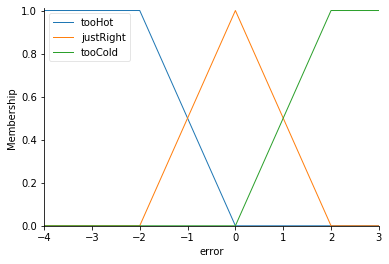

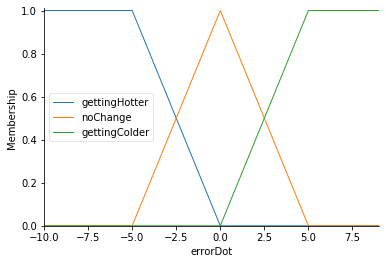

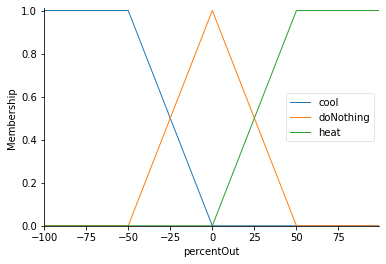

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl




error = ctrl.Antecedent(np.arange(-4,4,1),'error')
errorDot = ctrl.Antecedent(np.arange(-10,10,1),'errorDot')

percentOut = ctrl.Consequent(np.arange(-100,100,1),'percentOut')


error['tooHot']=fuzz.trapmf(error.universe,[-4,-4,-2,0])
error['justRight']=fuzz.trimf(error.universe,[-2,0,2])
error['tooCold']=fuzz.trapmf(error.universe,[0,2,4,4])

errorDot['gettingHotter']=fuzz.trapmf(errorDot.universe,[-10,-10,-5,0])
errorDot['noChange']=fuzz.trimf(errorDot.universe,[-5,0,5])
errorDot['gettingColder']=fuzz.trapmf(errorDot.universe,[0,5,10,10])

percentOut['cool']=fuzz.trapmf(percentOut.universe,[-100,-100,-50,0])
percentOut['doNothing']=fuzz.trimf(percentOut.universe,[-50,0,50])
percentOut['heat']=fuzz.trapmf(percentOut.universe,[0,50,100,100])


error.view()
errorDot.view()
percentOut.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x18c8ee28948>)

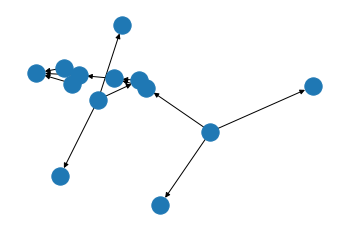

In [5]:
rule1 = ctrl.Rule(error['tooCold'] & errorDot['gettingColder'],percentOut['heat'])
rule2 = ctrl.Rule(error['tooCold'] & errorDot['noChange'],percentOut['heat'])
rule3 = ctrl.Rule(error['tooCold'] & errorDot['gettingHotter'],percentOut['heat'])
rule4 = ctrl.Rule(error['justRight'] & errorDot['gettingColder'],percentOut['heat'])
rule5 = ctrl.Rule(error['justRight'] & errorDot['noChange'],percentOut['doNothing'])
rule6 = ctrl.Rule(error['justRight'] & errorDot['gettingHotter'],percentOut['cool'])
rule7 = ctrl.Rule(error['tooHot'] & errorDot['gettingColder'],percentOut['cool'])
rule8 = ctrl.Rule(error['tooHot'] & errorDot['noChange'],percentOut['cool'])
rule9 = ctrl.Rule(error['tooHot'] & errorDot['gettingHotter'],percentOut['cool'])

rule1.view()

-47.566079295154076


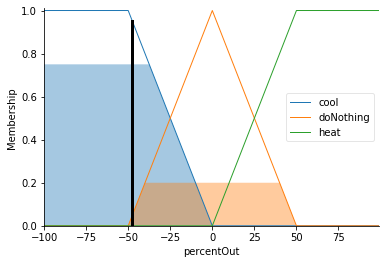

In [7]:
percent_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
percentControl = ctrl.ControlSystemSimulation(percent_ctrl)

percentControl.input['error']=-1.5
percentControl.input['errorDot']=-4

percentControl.compute()

print(percentControl.output['percentOut'])
percentOut.view(sim=percentControl)

-45.47760076252723


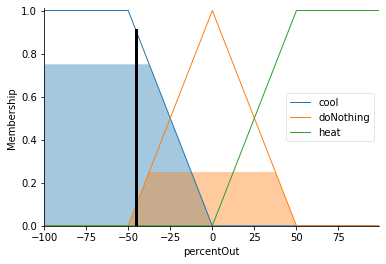

In [8]:
percent_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
percentControl = ctrl.ControlSystemSimulation(percent_ctrl)

percentControl.input['error']=-1.5
percentControl.input['errorDot']=-1

percentControl.compute()

print(percentControl.output['percentOut'])
percentOut.view(sim=percentControl)

16.219036634261546


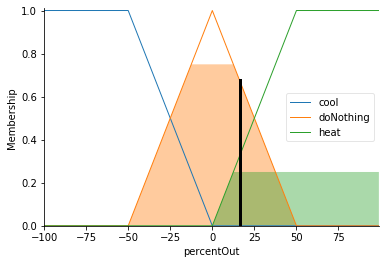

In [9]:
percent_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
percentControl = ctrl.ControlSystemSimulation(percent_ctrl)

percentControl.input['error']=0.5
percentControl.input['errorDot']=1

percentControl.compute()

print(percentControl.output['percentOut'])
percentOut.view(sim=percentControl)

47.01113089937667


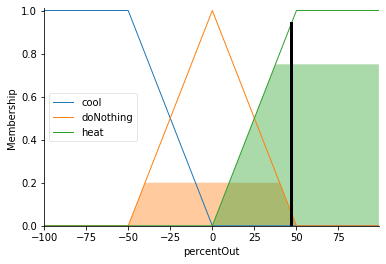

In [10]:
percent_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
percentControl = ctrl.ControlSystemSimulation(percent_ctrl)

percentControl.input['error']=0.5
percentControl.input['errorDot']=4

percentControl.compute()

print(percentControl.output['percentOut'])
percentOut.view(sim=percentControl)

# Turtle

In [14]:
import turtle as tu
from random import *

n = randint(0,5)

ts = tu.getscreen()
ts.clear()
ts.bgpic("champcourse2.gif")

ts.title("Bienvenue Ã  la course des tortues !")

ts.setup (width=1400, height=800, startx=0, starty=0)

Michelangelo = tu.Turtle()
Leonardo = tu.Turtle()
Raphael = tu.Turtle()
Donatelo = tu.Turtle()
Splinter = tu.Turtle()


Michelangelo.color('orange')
Michelangelo.penup()
Michelangelo.goto(-600,300)


Leonardo.color('deep sky blue')
Leonardo.penup()
Leonardo.goto(-600,150)

Raphael.color('red')
Raphael.penup()
Raphael.goto(-600,0)

Splinter.color('black')
Splinter.penup()
Splinter.goto(-600,-150)

Donatelo.color('green')
Donatelo.penup()
Donatelo.goto(-600,-300)



tab=[Michelangelo,Leonardo,Raphael,Splinter,Donatelo]
def runTurtle (turtleRun) :
    if turtleRun.xcor > 1380 :
        return True
    else :
        turtleRun.forward(n)
        
tabfinish = []
while len(tabfinish)<5 :
    for turtleToRun in tab:
        finish = runTurtle(turtleToRun)
        if finish == True :
            tabfinish.append(turtleToRun)
            tab.remove(turtleToRun)




tu.exitonclick()



TypeError: '>' not supported between instances of 'method' and 'int'